## Assignment-9 Regression Analysis

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
sns.set()

In [128]:
df  = pd.read_csv('Student_Marks - Sheet1.csv') 

In [129]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
126,3,6.335,32.357
127,3,0.301,5.609
128,4,7.163,41.444
129,7,0.309,12.027


In [130]:
df.describe()

,number_courses,time_study,Marks
count,131.000000,127.000000,122.000000
mean,5.251908,3.880661,23.427475
std,1.820159,2.340316,13.812173
min,2.000000,0.096000,5.609000
25%,4.000000,1.968000,12.151250
50%,5.000000,3.919000,19.680500
75%,7.000000,6.103000,32.076750
max,8.000000,7.957000,55.299000


In [131]:
df.isna().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

In [132]:
df.isna().any()

number_courses    False
time_study         True
Marks              True
dtype: bool

In [133]:
df['time_study'].isna().sum()

4

In [134]:
df['time_study'].fillna(df['time_study'].mean(),inplace = True)

In [135]:
df['Marks'].isna().sum()

9

In [136]:
df['Marks'].fillna(df['Marks'].median(),inplace = True)

In [137]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

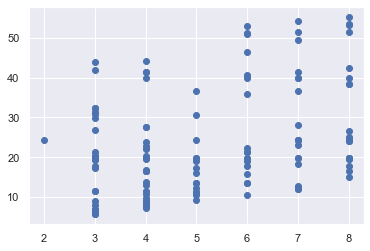

In [138]:
plt.scatter(df['number_courses'],df['Marks'])
plt.show()

In [139]:
bar_data = pd.DataFrame(df['number_courses'].value_counts()).reset_index()

In [140]:
bar_data

,index,number_courses
0,3,29
1,4,27
2,8,21
3,7,20
4,6,18
5,5,15
6,2,1


<BarContainer object of 7 artists>

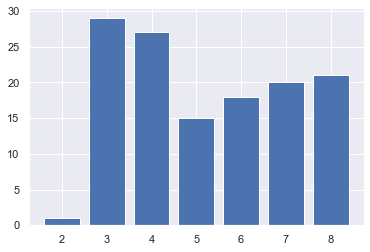

In [141]:
plt.bar(bar_data['index'],bar_data['number_courses'])

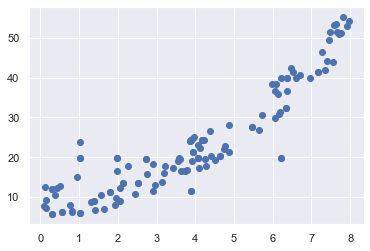

In [142]:
plt.scatter(df['time_study'],df['Marks'])
plt.show()

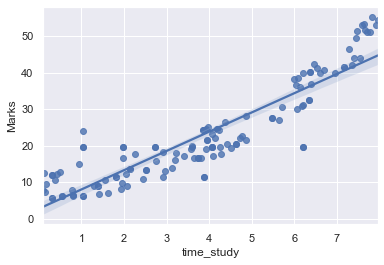

In [143]:
sns.regplot(data = df,x = 'time_study',y = 'Marks')
plt.show()

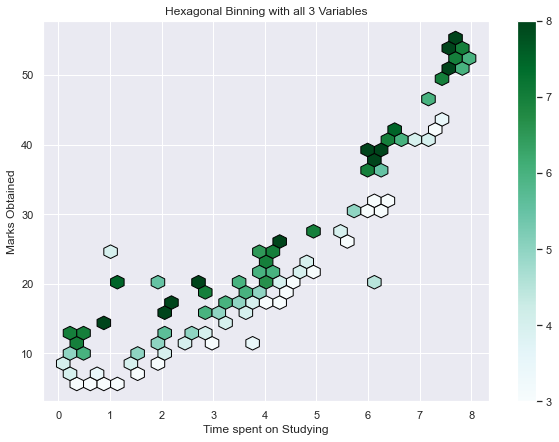

In [144]:
ax = df.plot.hexbin(x='time_study', y='Marks',C = 'number_courses',gridsize=30, sharex=False, figsize=(10,7),edgecolor = 'black')
ax.set_xlabel('Time spent on Studying')
ax.set_ylabel('Marks Obtained')
ax.set_title("Hexagonal Binning with all 3 Variables")
plt.show()

## Simple Linear Regression

In [145]:
x1_simple = df['time_study']
y_simple = df['Marks']

In [146]:
x_simple = sm.add_constant(x1_simple)
model = sm.OLS(y_simple,x_simple).fit()

In [147]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     620.1
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.09e-51
Time:                        21:09:57   Log-Likelihood:                -409.74
No. Observations:                 131   AIC:                             823.5
Df Residuals:                     129   BIC:                             829.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6978      0.955      2.824      0.005       0.808       4.588
time_study     5.2755      0.212     24.902      0.000       4.856       5.695
==============================================================================
Omnibus:                        1.291   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.845
Skew:                           0.129   Prob(JB):                        0.655
Kurtosis:                       3.297   Cond. No.                         9.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
c = 2.6978
m = 5.2755

In [149]:
yhat = m*x1_simple + c

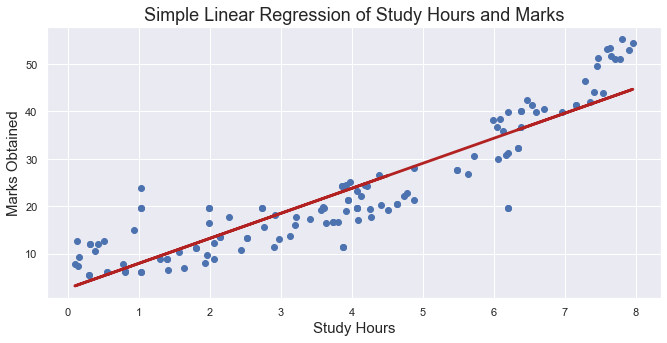

In [150]:
plt.figure(figsize=(11,5))
plt.scatter(x1_simple,y_simple)
plt.plot(x1_simple,yhat,color = 'firebrick',lw = 2.8)
plt.xlabel("Study Hours",fontsize = 15)
plt.ylabel("Marks Obtained", fontsize=15)
plt.title("Simple Linear Regression of Study Hours and Marks",fontsize = 18)
plt.show()

## Polynomial Regression

In [151]:
x = df['time_study']
y = df['Marks']

In [152]:
model = np.poly1d(np.polyfit(x,y,2))

In [153]:
print(model)

        2
0.7305 x - 0.5234 x + 10.35


In [154]:
model(x)[0:10]

array([22.83765884, 10.30951078, 15.88298239, 51.90460421, 50.83059549,
       16.20360526, 34.03081703, 17.07525066, 22.25056686, 34.95639839])

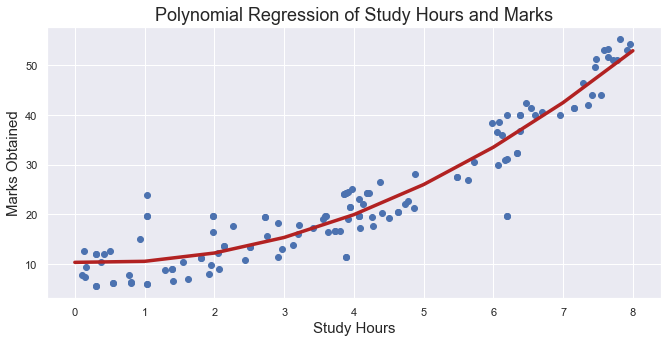

In [155]:
plt.figure(figsize=(11,5))
plt.scatter(x,y)
plt.plot(np.arange(0,9),model(np.arange(0,9)),color ='firebrick',lw = 3.5)
plt.xlabel("Study Hours",fontsize = 15)
plt.ylabel("Marks Obtained", fontsize=15)
plt.title("Polynomial Regression of Study Hours and Marks",fontsize = 18)
plt.show()

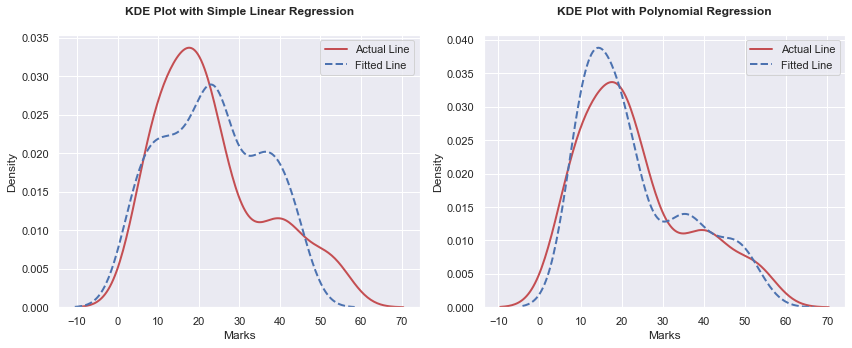

In [156]:
fig,axes = plt.subplots(1,2, figsize = (12,5))

p1 = sns.kdeplot(df['Marks'], color = 'r', label = 'Actual Line', ax = axes[0],linewidth = 2)
p2 = sns.kdeplot(df['Marks'], color = 'r', label = 'Actual Line', ax = axes[1],linewidth = 2)

sns.kdeplot(yhat, color = 'b', label = "Fitted Line", ax = p1,linestyle = '--',linewidth = 2)
sns.kdeplot(model(x), color = 'b', label = "Fitted Line", ax = p2,linestyle = '--',linewidth = 2)

p1.set_title("KDE Plot with Simple Linear Regression",fontweight='bold',pad=20)
p2.set_title("KDE Plot with Polynomial Regression",fontweight='bold',pad=20)

plt.tight_layout()
p1.legend()
p2.legend()

plt.show()